Задание 3.1

Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.

Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических 6 — как политические.

Найдите метрику accuracy. Ответ округлите до сотых.

$accuracy = \frac{TP + TN}{TP + TN + FN + FP}$

In [9]:
print(round((6+14) / (6+14+9+6), 2))

0.57


### <center> РАСЧЁТ МЕТРИК НА PYTHON

In [3]:
from sklearn import metrics #Весь набор функций для вычисления метрик в sklearn находится в модуле  metrics.
from sklearn import linear_model #линейные модели

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

Функции, которые нам понадобятся:

confusion_matrix() — расчёт матрицы ошибок,

accuracy_score() — расчёт accuracy,

precision_score() — расчёт precision,

recall_score() — расчёт recall,

f1_score() — расчёт -меры.

Каждая из этих функций первым аргументом принимает предсказанные значения целевой переменной $\hat{y}$, а вторым аргументом — истинные ответы $y$.

In [4]:
# Из прошлого юнита сделаем матрицу ошибок. Импортируем дата сет и обучам модель на отдельных и всех факторах.
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [5]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [6]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [-8.24898965]
# w1, w2: [[0.03779275 0.0875742 ]]

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [7]:
# Обучаем модель на всех факторах
X_full = diabetes_data.drop('Outcome', axis=1)
y_full = diabetes_data['Outcome']

#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X_full, y_full)

LogisticRegression(max_iter=1000, random_state=42)

In [8]:
#Делаем предсказание моделью, обученной на двух факторах 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех факторах 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

Построим матрицы ошибок для каждой модели, а затем отобразим их в виде тепловых карт:

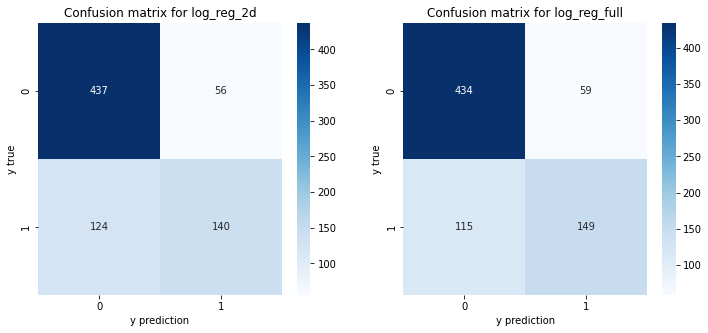

In [9]:
#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');